<a href="https://colab.research.google.com/github/modinitin13/HandWrittenDigitRecognition/blob/master/HandWrittenDigitUsingMnistDataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#MNIST is a dataset of 60,000 small square 28×28 pixel grayscale images of handwritten single digits between 0 and 9.
import numpy as np
from numpy import mean
from numpy import std
from matplotlib import pyplot
from PIL import Image  
from sklearn.model_selection import KFold
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array

In [0]:
def func_load_dataset():
    (trainX, trainY), (testX, testY) = mnist.load_data()
    trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
    testX = testX.reshape((testX.shape[0], 28, 28, 1))
    trainY = to_categorical(trainY)
    testY = to_categorical(testY)
    return trainX, trainY, testX, testY

In [0]:
def func_normalise(trainX,testX):
  train_N = trainX.astype('float32')
  test_N = testX.astype('float32')
  train_N = train_N / 255.0
  test_N = test_N / 255.0
  return train_N,test_N

In [0]:
def func_define_model():
	model = Sequential()
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
	model.add(MaxPooling2D((2, 2)))
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform'))
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform'))
	model.add(MaxPooling2D((2, 2)))
	model.add(Flatten())
	model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
	model.add(Dense(10, activation='softmax'))
	# compile model
	opt = SGD(lr=0.01, momentum=0.9)
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
	return model

In [0]:
  trainX, trainY, testX, testY = func_load_dataset()
  trainX, testX = func_normalise(trainX, testX)
  model = func_define_model()
  model.fit(trainX, trainY, epochs=10, batch_size=32, verbose=0)
  model.save('/content/drive/My Drive/HandWrittenDigit/final_model.h5')


In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


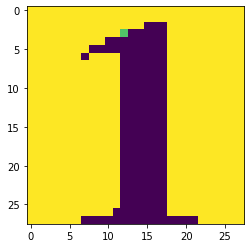

[4]


In [0]:
img=load_img('/content/drive/My Drive/HandWrittenDigit/Examples/7.png',grayscale=True,target_size=(28,28))
pyplot.imshow(img)
pyplot.show()
img=img_to_array(img);
img = img.reshape((1,28, 28, 1))
img = img.astype('float32')
img = img / 255.0
digit = model.predict_classes(img)
print(digit)